# **Aula 3**
---

## **Gráficos de distribuições de frequência**

Um **histograma de frequência relativa** tem a mesma forma e a mesma escala horizontal de um histograma de frequência absoluta, mas a escala vertical é diferente. A área de cada retângulo é igual à frequência relativa da classe. A área total do histograma é igual a 1.

In [1]:
import pandas as pd
from math import ceil
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7
# Distribuição de frequência
dist_freq = data.value_counts(bins=7).sort_index()
# Reconfiguração do conjunto de dados: Series para DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = round((v_max-v_min)/n_classes)+1
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data)
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
nova_dist_freq

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


(código para seguirmos com os mesmos dados da aula anterior)

## **Histograma de frequência relativa**

A estratégia para construir um histograma de frequência relativa é a mesma que para construir um histograma de frequência absoluta. A única diferença é que, ao invés de calcularmos a frequência absoluta de cada classe, calculamos a frequência relativa de cada classe. A diferença é o uso do parâmetro weights, que é um vetor de pesos, onde cada elemento do vetor é o peso da observação correspondente. No caso do histograma de frequência absoluta, o peso de cada observação é 1. No caso do histograma de frequência relativa, o peso de cada observação é a frequência relativa da classe correspondente. 

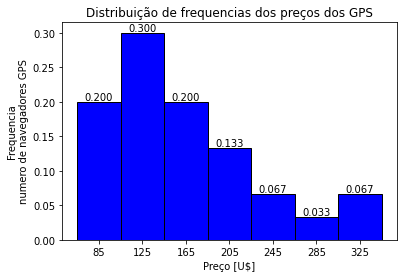

In [2]:
import numpy as np # biblioteca para cálculos numéricos

histograma = data.hist(bins=[inter.left for inter in intervalos] + 
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color='blue', edgecolor='black', grid=False,
                       weights=np.ones_like(data)/observacoes) # ones_like: cria um array com o mesmo tamanho de data, porém dividido por observacoes

histograma.set(xlabel = 'Preço [U$]', # nome do eixo x
               ylabel = 'Frequencia\nnumero de navegadores GPS', # nome do eixo y
               title = 'Distribuição de frequencias dos preços dos GPS', # título do gráfico
               xticks = nova_dist_freq['Pontos médios']) # define os pontos médios como marcadores do eixo x

# Inserção de rótulos nas barras do histograma

barras = histograma.patches # pega as barras do histograma
freqs = nova_dist_freq['Frequência relativa'] # pega as frequências relativas
for barra, freq in zip(barras, freqs): # para cada barra e frequência
    altura = barra.get_height() # pega a altura da barra
    texto_freq = f'{freq:.3f}' # formata a frequência para 3 casas decimais
    histograma.text(barra.get_x()+barra.get_width()/2, altura, # insere o texto no centro da barra
                    texto_freq, ha='center', va='bottom') # alinhamento horizontal e vertical

# **Histograma de frequência relativa com escala vertical expressa em porcentagem**

Outra forma de construir um histograma de frequência relativa é com a escala vertical expressa em porcentagem. Para isso, basta multiplicar os pesos por 100.

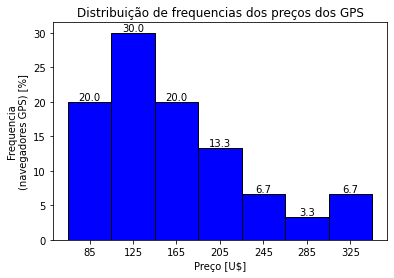

In [3]:
histograma_perc = data.hist(bins=[inter.left for inter in intervalos] +
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color='blue', edgecolor='black', grid=False,
                       weights=np.ones_like(data)*100/observacoes) # observe que agora os pesos são multiplicados por 100 antes de serem divididos por observacoes

histograma_perc.set(xlabel = 'Preço [U$]',
               ylabel = 'Frequencia\n(navegadores GPS) [%]', # alteração do nome do eixo y
               title = 'Distribuição de frequencias dos preços dos GPS',
               xticks = nova_dist_freq['Pontos médios'])

barras = histograma_perc.patches
freqs = nova_dist_freq['Frequência relativa']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}' # observe que agora a frequência é multiplicada por 100 antes de ser formatada
    histograma_perc.text(barra.get_x()+barra.get_width()/2, altura,
                         texto_freq, ha='center', va='bottom')

## **Ogiva (gráfico de frequência acumulada)**

Para descrever o número de registros de dados que são menores que ou iguais a um determinado valor limite, utiliza-se um **gráfico de frequência acumulada.** 

Um **gráfico de frequência acumulada** ou **ogiva** é um gráfico de linhas que mostra a frequência acumulada até cada classe em sua fronteira inferior. As fronteiras superiores são marcadas no eixo horizontal e as frequências acumuladas são marcadas no eixo vertical. 




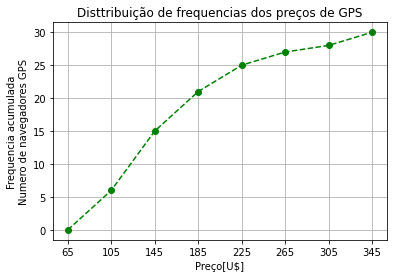

In [4]:
import matplotlib.pyplot as plt # biblioteca para plotar gráficos

fic_left = [nova_dist_freq['Classe'][0].left] # pega o limite esquerdo da primeira classe
x_data = fic_left + [extremo.right for extremo in nova_dist_freq['Classe']] # pega os limites direitos de todas as classes e adiciona ao limite esquerdo da primeira classe
y_data = [0] + list(nova_dist_freq['Frequência acumulada']) # pega as frequências acumuladas e adiciona 0 no início

# Plotagem da ogiva, com diversos atributos
plt.plot(x_data, y_data, 'go--') # plota a ogiva com x_data e y_data, com bolinhas verdes e traços pontilhados
plt.xlabel('Preço[U$]') # nome do eixo x
plt.ylabel('Frequencia acumulada\nNumero de navegadores GPS') # nome do eixo y
plt.title('Disttribuição de frequencias dos preços de GPS') # título do gráfico
plt.xticks(x_data) # define x_data (limite esquerdo da primeira classe + limites direitos das demais) como marcadores do eixo x
plt.grid() # adiciona uma grade no gráfico

## **Gráfico de pizza**

**Gráficos de pizza** fornecem uma maneira conveniente de apresentar graficamente dados qualitativos como percentagens de um todo. 

*Os números de títulos conferidos (em milhares) em 2011 nos Estaum cireuto dividido em dos Unidos constam na tabela a seguir. Construa um gráfico de pizza para representar esses dados.*


In [6]:
dados = [ 
    ['Tecnólogo', 942], 
    ['Bacharelado', 1716], 
    ['Mestrado', 731], 
    ['Doutorado', 164]
         ] # Criação do conjunto de dados
tabela = pd.DataFrame(dados, columns = ['Título', 'Frequencia']) # criação da tabela
display(tabela)

,Título,Frequencia
0,Tecnólogo,942
1,Bacharelado,1716
2,Mestrado,731
3,Doutorado,164


Para isso, devemos calcular a frequência relativa de cada classe e multiplicar por 360 para obter o ângulo correspondente a cada classe. Ou, ao invés disso, podemos usar o método **pie** do matplotlib, que calcula os ângulos automaticamente e plota o gráfico de pizza. O método pie recebe como parâmetro um vetor com as frequências relativas das classes e um vetor com as etiquetas das classes. Além disso, autopct é um parâmetro opcional que permite que o matplotlib calcule e imprima a porcentagem correspondente a cada classe, e startangle permite que o gráfico seja rotacionado em um ângulo específico.

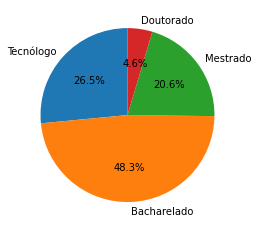

In [7]:
pizza = plt.pie(tabela['Frequencia'], labels = tabela['Título'],
                autopct = '%1.1f%%', startangle = 90)

## **Gráfico de Pareto**

O **gráfico de Pareto** é um gráfico de barras verticais no qual a altura de cada barra representa a frequência ou a frequência relativa. 

*Recentemente, a indústria de varejo perdeu US$ 34.5 bilhões com redução nos estoques. A redução de estoque é uma perda de estoque por meio de quebra, roubo de carga, roubo em lojas e assim por diante. As principais causas da redução de estoque são erro administrativo (US$ 4,2 bilhões), roubo por funcionários (US$ 15,1 bilhões), roubo em lojas (US$ 12,3 bilhões), desconhecida (US$ 1,1 bilhão) e fraude nas vendas (US$ 1,7 bilhão). Use um gráfico de Pareto para organizar os dados. Qual causa de redução de estoque os varejistas deveriam tratar primeiro?*

In [9]:
dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
dados.index = ['Erro Adm', 'Roubo funcionários',
               'Roubo lojas', 'Desconhecida', 'Fraude vendas'] # define os índices
# Note que o conjunto de dados é criado novamente usando o Pandas, porém empregando um dicionário para representar a coluna de valores. Também será incluída a representação de porcentagem acumulada. 

dados = dados.sort_values(by='Valores', ascending=False) # ordena os valores em ordem decrescente

dados['PorcAcum'] = dados['Valores'].cumsum() / dados['Valores'].sum()*100 # calcula a porcentagem acumulada

display(dados)


,Valores,PorcAcum
Roubo funcionários,15.1,43.895349
Roubo lojas,12.3,79.651163
Erro Adm,4.2,91.860465
Fraude vendas,1.7,96.802326
Desconhecida,1.1,100.000000


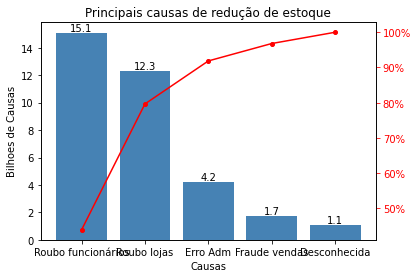

In [10]:
from matplotlib.ticker import PercentFormatter # importa o módulo para formatar os valores em porcentagem (por algum motivo, isso é necessário)

cor_barra = 'steelblue' # define a cor das barras
cor_linha = 'red' # define a cor da linha
tam_linha = 4 # define o tamanho da linha

fig, pareto = plt.subplots() # cria o objeto fig e pareto usando subplots, que permite a criação de múltiplos gráficos em uma mesma figura

pareto.bar(dados.index, dados['Valores'], color=cor_barra) # cria o gráfico de barras

pareto.set(xlabel='Causas', # define o nome do eixo x
           ylabel='Bilhoes de Causas', # define o nome do eixo y
           title='Principais causas de redução de estoque') # define o título do gráfico

barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores): # acho que você já entendeu o que esse loop faz
    altura = barra.get_height()
    pareto.text(barra.get_x()+barra.get_width()/2, altura,
                valor, ha='center', va='bottom')
    
linha = pareto.twinx() # twinx permite a criação de um segundo eixo y, que compartilha o mesmo eixo x

linha.plot(dados.index, dados['PorcAcum'], 
           color=cor_linha, marker='o', ms=tam_linha) # cria o gráfico de linha

linha.yaxis.set_major_formatter(PercentFormatter()) # define o formato dos valores do eixo y como porcentagem (por isso o import)

linha.tick_params(axis='y', colors = cor_linha) # define a cor dos valores do eixo y

## **Dados emparelhados**

Quando cada valor em um conjunto de dados está associado a um valor em outro conjunto de dados, dizemos que os dados estão **emparelhados**. Uma maneira de representar dados emparelhados é com um **gráfico de dispersão**, no qual os valores de um conjunto de dados são plotados no eixo horizontal e os valores do outro conjunto de dados são plotados no eixo vertical. 

O conjunto de dados Íris de Fisher, elaborado pelo estatístico britânico Ronald Fisher, será utilizado como exemplo. Esse conjunto de dados descreve várias características físicas, tais como o comprimento e a largura das pétalas (em centímetros), para três espécies da flor íris. **<font color="red">(ATENÇÃO: O arquivo iris.csv disponível no OpenLMS deve ser importado ao notebook caso esteja usando o Colab, ou deve estar no mesmo diretório que o arquivo ipynb caso esteja utilizando o VCode)</font>**


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


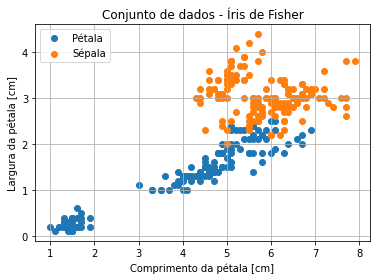

In [12]:
iris = pd.read_csv('iris.csv') # leitura do arquivo iris.csv
display(iris.head()) # exibição das primeiras linhas do arquivo

plt.scatter(iris['petallength'], iris['petalwidth']) # scatter plota um gráfico de dispersão com os valores de petallength e petalwidth como eixos x e y, respectivamente
plt.scatter(iris['sepallength'], iris['sepalwidth']) # adiciona um segundo gráfico de dispersão com os valores de sepallength e sepalwidth como eixos x e y, respectivamente
plt.xlabel('Comprimento da pétala [cm]') # define o nome do eixo x
plt.ylabel('Largura da pétala [cm]') # define o nome do eixo y
plt.title('Conjunto de dados - Íris de Fisher') # define o título do gráfico
plt.legend(['Pétala', 'Sépala']) # define a legenda do gráfico
plt.grid() # adiciona uma grade no gráfico

## **Gráfico de dispersão - Série Temporal**

Um conjunto de dados cujos valores são obtidos em intervalos de tempo regulares é chamado de **série temporal**. Um gráfico de dispersão é uma maneira conveniente de representar uma série temporal. (Um gráfico de série temporal tem em seu eixo horizontal uma escala de tempo e no eixo vertical os valores da série temporal.)

A tabela a seguir lista o número de assinantes de telefonia celular (em milhões) e o valor médio mensal da conta dos assinantes pelo serviço (em dólares) para os anos de 2002 a 2012 (Fonte: Cellular Telecommunications & Internet Association).

In [13]:
dados = pd.DataFrame({'Assinantes': [134.6, 148.1, 169.5, 194.5, 219.7, 243.4,
                                     262.7, 276.6, 292.8, 306.3, 321.7],
                      'Conta média':[47.42, 49.46, 49.49, 49.52, 49.30, 49.94,
                                     48.54, 49.57, 47.47, 47.23, 47.16]})
dados.index = list(range(2002, 2013)) # muda os índices da tabela para os anos em que os dados foram medidos
display(dados)

,Assinantes,Conta média
2002,134.6,47.42
2003,148.1,49.46
2004,169.5,49.49
2005,194.5,49.52
2006,219.7,49.30
2007,243.4,49.94
2008,262.7,48.54
2009,276.6,49.57
2010,292.8,47.47
2011,306.3,47.23


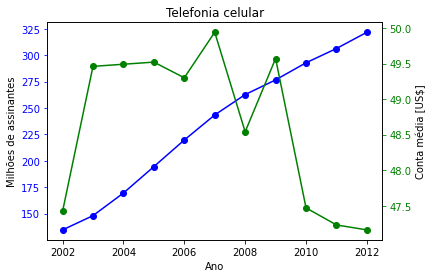

In [14]:
fig, assinantes = plt.subplots() # cria o objeto fig e assinantes usando subplots, que permite a criação de múltiplos gráficos em uma mesma figura
assinantes.plot(dados.index, dados['Assinantes'], 'bo-') # aqui, ao invés de usar o scatter, usamos o plot, que permite a criação de gráficos de linha
assinantes.set(xlabel='Ano',
           ylabel='Milhões de assinantes',
           title = 'Telefonia celular')
assinantes.tick_params(axis='y', colors='blue') # define a cor dos valores do eixo y
conta = assinantes.twinx() # cria um segundo eixo y, que compartilha o mesmo eixo x
conta.plot(dados.index, dados['Conta média'], 'go-') # cria um segundo gráfico de linha
conta.set(ylabel='Conta média [US$]')
conta.tick_params(axis='y', colors='green') # define a cor dos valores do eixo y